In [1]:
import pandas as pd

In [2]:
filename_ssrd_regions = "./all_ssrd_regions.parquet"
filename_energy_preduction = "../../clean_datasets/rte_agg_daily_2014_2024.csv"

In [79]:
df_ssrd_regions = pd.read_parquet(filename_ssrd_regions)
#sanitise the column names
df_ssrd_regions.columns = [col.replace(" ", "_").replace("'", "_").replace("-", "_").lower() for col in df_ssrd_regions.columns]
region_names = df_ssrd_regions.columns
df_ssrd_regions["days_from_start"] = [ (date - df_ssrd_regions.index[0]).days for date in df_ssrd_regions.index ]
df_ssrd_regions.head()

,île_de_france,centre_val_de_loire,normandie,hauts_de_france,grand_est,pays_de_la_loire,bretagne,nouvelle_aquitaine,occitanie,provence_alpes_côte_d_azur,days_from_start
valid_time,,,,,,,,,,,
2022-02-02,364107.125,833354.25,1.018459e+06,5.122071e+05,1079414.500,2954247.75,3941158.000,4446739.50,7578794.0,10219847.0,0
2022-02-03,1770130.375,3926738.75,3.727656e+06,1.595124e+06,877572.375,5871586.00,5412529.500,5776847.50,7016970.0,10318939.0,1
2022-02-04,2102861.250,3602973.00,1.132752e+06,1.166943e+06,2987945.000,2875029.25,1957783.875,5231521.00,8228168.5,9198665.0,2
2022-02-05,2734215.500,2212077.25,3.957335e+06,2.888187e+06,2090590.625,4045592.50,5473491.000,2703470.25,5716585.0,9366410.0,3
2022-02-06,6593917.500,7413162.00,6.310204e+06,6.233598e+06,5852349.000,8125390.50,7660491.000,9669591.00,7812715.5,10605853.0,4


In [80]:
df_energy_preduction = pd.read_csv(filename_energy_preduction, index_col=0)[["Solaire"]]
df_energy_preduction.index = pd.to_datetime(df_energy_preduction.index)
df_energy_preduction.head(), df_energy_preduction.tail()

(            Solaire
 Date               
 2015-01-01  11370.5
 2015-01-02   8297.5
 2015-01-03   5860.5
 2015-01-04   6926.0
 2015-01-05   9786.5,
             Solaire
 Date               
 2024-04-04  76581.5
 2024-04-05  72847.5
 2024-04-06  61577.5
 2024-04-07  46718.5
 2024-04-08  26677.0)

In [81]:
df_energy_preduction.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2024-03-30', '2024-03-31', '2024-04-01', '2024-04-02',
               '2024-04-03', '2024-04-04', '2024-04-05', '2024-04-06',
               '2024-04-07', '2024-04-08'],
              dtype='datetime64[ns]', name='Date', length=3386, freq=None)

In [82]:
# align the indexes of the two dataframes
data = pd.concat([df_ssrd_regions, df_energy_preduction], join="inner", axis=1)
data.head()

,île_de_france,centre_val_de_loire,normandie,hauts_de_france,grand_est,pays_de_la_loire,bretagne,nouvelle_aquitaine,occitanie,provence_alpes_côte_d_azur,days_from_start,Solaire
2022-02-02,364107.125,833354.25,1.018459e+06,5.122071e+05,1079414.500,2954247.75,3941158.000,4446739.50,7578794.0,10219847.0,0,21271.0
2022-02-03,1770130.375,3926738.75,3.727656e+06,1.595124e+06,877572.375,5871586.00,5412529.500,5776847.50,7016970.0,10318939.0,1,20527.5
2022-02-04,2102861.250,3602973.00,1.132752e+06,1.166943e+06,2987945.000,2875029.25,1957783.875,5231521.00,8228168.5,9198665.0,2,19051.0
2022-02-05,2734215.500,2212077.25,3.957335e+06,2.888187e+06,2090590.625,4045592.50,5473491.000,2703470.25,5716585.0,9366410.0,3,41271.5
2022-02-06,6593917.500,7413162.00,6.310204e+06,6.233598e+06,5852349.000,8125390.50,7660491.000,9669591.00,7812715.5,10605853.0,4,21303.0


In [83]:
from statsmodels.formula.api import ols

In [84]:
exo_vars = df_ssrd_regions.columns
exo_vars = exo_vars.drop("days_from_start")
endog_var = "Solaire"

In [85]:
model = ols(f"""{endog_var} ~ {" + ".join(exo_vars)}""", data=data).fit()

In [86]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Solaire   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     213.2
Date:                Tue, 07 May 2024   Prob (F-statistic):          9.59e-213
Time:                        08:17:31   Log-Likelihood:                -8367.8
No. Observations:                 770   AIC:                         1.676e+04
Df Residuals:                     759   BIC:                         1.681e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   1.567e+04   1059.960     14.784      0.000    1.36e+04    1.78e+04
île_de_france                 -0.0005      0.000     -1.332      0.183      -0.001       0.000
centre_val_de_loire            0.0002      0.000      0.465      0.642      -0.001       0.001
normandie                     -0.0001      0.000     -0.460      0.645      -0.001       0.000
hauts_de_france                0.0005      0.000      1.549      0.122      -0.000       0.001
grand_est                  -6.521e-05      0.000     -0.310      0.757      -0.000       0.000
pays_de_la_loire               0.0003      0.000      0.852      0.395      -0.000       0.001
bretagne                       0.0010      0.000      4.209      0.000       0.001       0.001
nouvelle_aquitaine             0.0005      0.000      1.478      0.140      -0.000       0.001
occitanie                      0.0006      0.000      2.004      0.045    1.12e-05       0.001
provence_alpes_côte_d_azur     0.0007      0.000      4.314      0.000       0.000       0.001
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   1.255
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.630
Skew:                           0.033   Prob(JB):                        0.268
Kurtosis:                       3.279   Cond. No.                     1.08e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
predictions = model.predict(data[exo_vars])
err = data[endog_var] - predictions


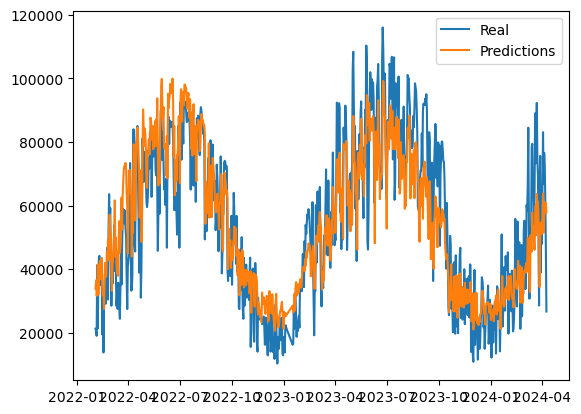

In [88]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(data.index, data[endog_var], label="Real")
ax.plot(data.index, predictions, label="Predictions")

ax.legend()

In [89]:
# compute mean absolute percentage error
mape = (err.abs() / data[endog_var]).mean()
mape

0.23542376138778584

In [90]:
data["mean_sun"] = data[exo_vars].mean(axis=1)

In [91]:
data

,île_de_france,centre_val_de_loire,normandie,hauts_de_france,grand_est,pays_de_la_loire,bretagne,nouvelle_aquitaine,occitanie,provence_alpes_côte_d_azur,days_from_start,Solaire,mean_sun
2022-02-02,3.641071e+05,833354.25,1.018459e+06,5.122071e+05,1.079414e+06,2954247.75,3.941158e+06,4446739.50,7578794.0,10219847.0,0,21271.0,3294832.75
2022-02-03,1.770130e+06,3926738.75,3.727656e+06,1.595124e+06,8.775724e+05,5871586.00,5.412530e+06,5776847.50,7016970.0,10318939.0,1,20527.5,4629409.00
2022-02-04,2.102861e+06,3602973.00,1.132752e+06,1.166943e+06,2.987945e+06,2875029.25,1.957784e+06,5231521.00,8228168.5,9198665.0,2,19051.0,3848464.00
2022-02-05,2.734216e+06,2212077.25,3.957335e+06,2.888187e+06,2.090591e+06,4045592.50,5.473491e+06,2703470.25,5716585.0,9366410.0,3,41271.5,4118795.25
2022-02-06,6.593918e+06,7413162.00,6.310204e+06,6.233598e+06,5.852349e+06,8125390.50,7.660491e+06,9669591.00,7812715.5,10605853.0,4,21303.0,7627728.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-04,8.654508e+06,10312730.00,1.241820e+07,8.190210e+06,5.416230e+06,10896658.00,1.216302e+07,11941634.00,17149676.0,16876614.0,792,76581.5,11401946.00
2024-04-05,1.167901e+07,7793872.00,1.350304e+07,1.245440e+07,6.578515e+06,6263347.00,8.513323e+06,15404394.00,21148934.0,21228658.0,793,72847.5,12456749.00
2024-04-06,7.475415e+06,8886993.00,1.097516e+07,9.071053e+06,1.158327e+07,7231543.00,1.031638e+07,17492540.00,19390780.0,20519048.0,794,61577.5,12294218.00
2024-04-07,1.771388e+07,18242866.00,1.272931e+07,1.548350e+07,1.895297e+07,11586472.00,1.056897e+07,16141961.00,19053506.0,21327394.0,795,46718.5,16180083.00


In [94]:
model_mean_sun = ols(f"Solaire ~ mean_sun + days_from_start", data=data).fit()
predictions_mean_sun = model_mean_sun.predict(data)
err_mean_sun = data[endog_var] - predictions_mean_sun

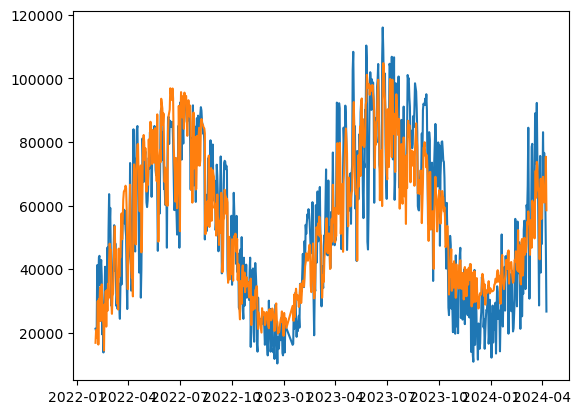

In [95]:
fig, ax = plt.subplots()
ax.plot(data.index, data[endog_var], label="Real")
ax.plot(data.index, predictions_mean_sun, label="Predictions")

In [96]:
mape_mean_sun = (err_mean_sun.abs() / data[endog_var]).mean()
mape_mean_sun

0.23279762813401436